<a href="https://colab.research.google.com/github/faizantanveeer/sentiment-analysis-customer-feedback/blob/main/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [170]:
import nltk
nltk.download('gutenberg')
nltk.download('genesis')
nltk.download('inaugural')
nltk.download('nps_chat')
nltk.download('webtext')
nltk.download('treebank')
nltk.download('udhr')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt')
nltk.download('tagsets')
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt_tab')
from nltk.book import *

[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!
[nltk_data] Downloading package genesis to /root/nltk_data...
[nltk_data]   Package genesis is already up-to-date!
[nltk_data] Downloading package inaugural to /root/nltk_data...
[nltk_data]   Package inaugural is already up-to-date!
[nltk_data] Downloading package nps_chat to /root/nltk_data...
[nltk_data]   Package nps_chat is already up-to-date!
[nltk_data] Downloading package webtext to /root/nltk_data...
[nltk_data]   Package webtext is already up-to-date!
[nltk_data] Downloading package treebank to /root/nltk_data...
[nltk_data]   Package treebank is already up-to-date!
[nltk_data] Downloading package udhr to /root/nltk_data...
[nltk_data]   Package udhr is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] 

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


In [171]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"faizantanveeer","key":"6942860683042f88b3c3ecb2abf1ef93"}'}

In [172]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [173]:
!kaggle datasets download -d yelp-dataset/yelp-dataset
!unzip yelp-dataset.zip -d yelp_dataset



Dataset URL: https://www.kaggle.com/datasets/yelp-dataset/yelp-dataset
License(s): other
User cancelled operation
Archive:  yelp-dataset.zip
replace yelp_dataset/Dataset_User_Agreement.pdf? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [174]:
import pandas as pd
import json

file_path = "/content/yelp_dataset/yelp_academic_dataset_review.json"
data = []

# Load only first 50,000 lines to avoid memory overload
with open(file_path, encoding="utf8") as f:
    for i, line in enumerate(f):
        if i == 50000:
            break
        data.append(json.loads(line))

df = pd.DataFrame(data)[['text', 'stars', 'date']]

print(df.columns)

Index(['text', 'stars', 'date'], dtype='object')


In [175]:
def label_sentiment(stars):
    if stars <= 2:
        return 'negative'
    elif stars == 3:
        return 'neutral'
    else:
        return 'positive'

df['sentiment'] = df['stars'].apply(label_sentiment)


In [176]:
print(df.head())

                                                text  stars  \
0  If you decide to eat here, just be aware it is...    3.0   
1  I've taken a lot of spin classes over the year...    5.0   
2  Family diner. Had the buffet. Eclectic assortm...    3.0   
3  Wow!  Yummy, different,  delicious.   Our favo...    5.0   
4  Cute interior and owner (?) gave us tour of up...    4.0   

                  date sentiment  
0  2018-07-07 22:09:11   neutral  
1  2012-01-03 15:28:18  positive  
2  2014-02-05 20:30:30   neutral  
3  2015-01-04 00:01:03  positive  
4  2017-01-14 20:54:15  positive  


In [177]:
import re
import string

def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r"@\w+", "", text)
    text = re.sub(f"[{string.punctuation}]", "", text)
    text = re.sub(r"\d+", "", text)
    text = re.sub(r"\s+", " ", text).strip()
    return text

df['clean_text'] = df['text'].apply(clean_text)


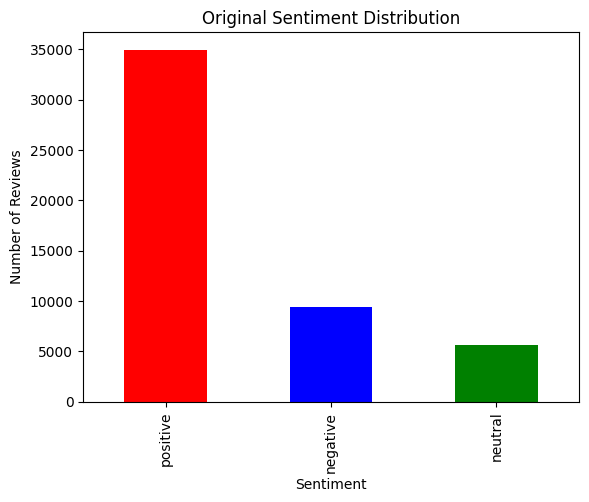

In [178]:
import matplotlib.pyplot as plt

df['sentiment'].value_counts().plot(kind='bar', color=['red', 'blue', 'green'])
plt.title("Original Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Number of Reviews")
plt.show()


In [179]:
from sklearn.model_selection import train_test_split

X = df['clean_text']
y = df['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [180]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=10000, ngram_range=(1,2))
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)


In [181]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

model = LogisticRegression(max_iter=1000)
model.fit(X_train_vec, y_train)

# Predict
y_pred = model.predict(X_test_vec)


In [182]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


Accuracy: 0.8612

Classification Report:

              precision    recall  f1-score   support

    negative       0.82      0.80      0.81      1877
     neutral       0.57      0.27      0.37      1130
    positive       0.89      0.97      0.93      6993

    accuracy                           0.86     10000
   macro avg       0.76      0.68      0.70     10000
weighted avg       0.84      0.86      0.84     10000



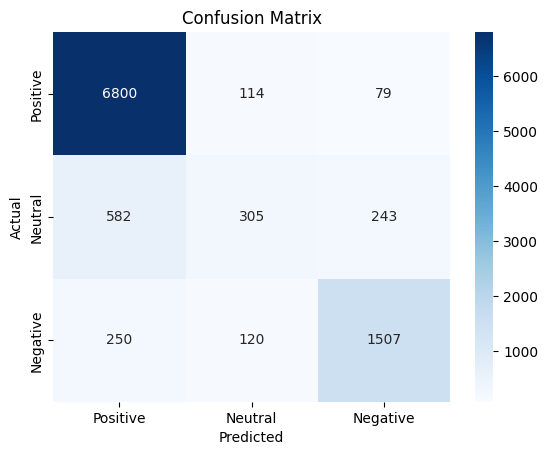

In [183]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred, labels=['positive', 'neutral', 'negative'])

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Positive', 'Neutral', 'Negative'],
            yticklabels=['Positive', 'Neutral', 'Negative'])

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


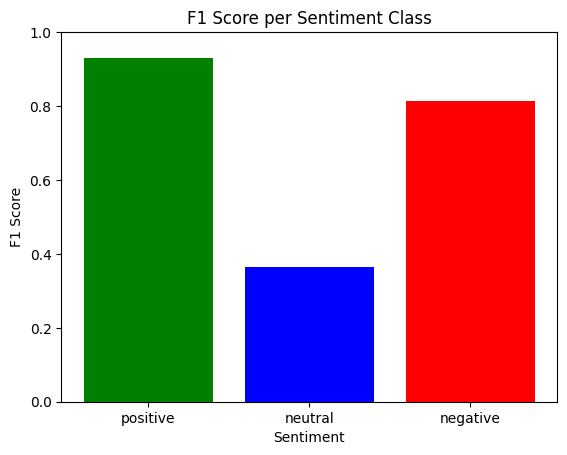

In [184]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred, output_dict=True)
f1_scores = {label: report[label]['f1-score'] for label in ['positive', 'neutral', 'negative']}

plt.bar(f1_scores.keys(), f1_scores.values(), color=['green', 'blue', 'red'])
plt.title("F1 Score per Sentiment Class")
plt.xlabel("Sentiment")
plt.ylabel("F1 Score")
plt.ylim(0, 1)
plt.show()


In [185]:
def predict_sentiment(review_text):
    cleaned = clean_text(review_text)
    vec = vectorizer.transform([cleaned])
    pred = model.predict(vec)
    return pred[0]

# Example
print(predict_sentiment("The food was aweful but the service was good"))


neutral


In [186]:
sample_reviews = [
    "The food was absolutely delicious, and the staff were incredibly friendly!",
    "Food was average, not great but not bad either.",
    "Not worth the money. Will never go again."
]

for review in sample_reviews:
    print(f"Review: {review}")
    print(f"Predicted Sentiment: {predict_sentiment(review)}\n")

Review: The food was absolutely delicious, and the staff were incredibly friendly!
Predicted Sentiment: positive

Review: Food was average, not great but not bad either.
Predicted Sentiment: neutral

Review: Not worth the money. Will never go again.
Predicted Sentiment: negative



# Sentiment Distribution

In [187]:
sentiment_counts = df['sentiment'].value_counts()
sentiment_percentages = sentiment_counts / len(df) * 100

print("📊 Sentiment Distribution:\n")
for sentiment, percent in sentiment_percentages.items():
    print(f"🔹 {sentiment.capitalize()}: {percent:.1f}%")


📊 Sentiment Distribution:

🔹 Positive: 69.9%
🔹 Negative: 18.8%
🔹 Neutral: 11.4%


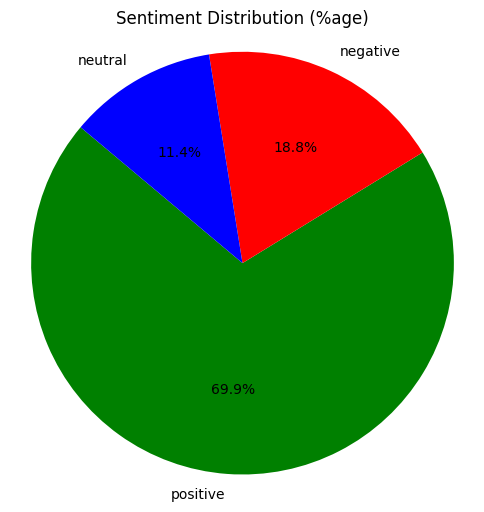

In [188]:
import matplotlib.pyplot as plt

# Pie Chart
colors = ['green', 'red', 'blue']
labels = sentiment_percentages.index
sizes = sentiment_percentages.values

plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title("Sentiment Distribution (%age)")
plt.axis('equal')  # Equal aspect ratio ensures pie is circular
plt.show()




#Sentiment Trend

In [189]:
df['date'] = pd.to_datetime(df['date'])  # Converts to datetime if not already


In [190]:
df['month'] = df['date'].dt.to_period('M')  # Month-based aggregation


In [191]:
print(df.columns)


Index(['text', 'stars', 'date', 'sentiment', 'clean_text', 'month'], dtype='object')


In [192]:
sentiment_trend = df.groupby(['month', 'sentiment']).size().unstack(fill_value=0)


In [212]:
sentiment_percent = sentiment_trend.div(sentiment_trend.sum(axis=1), axis=0) * 100


<ipython-input-214-501e625400a1>:28: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


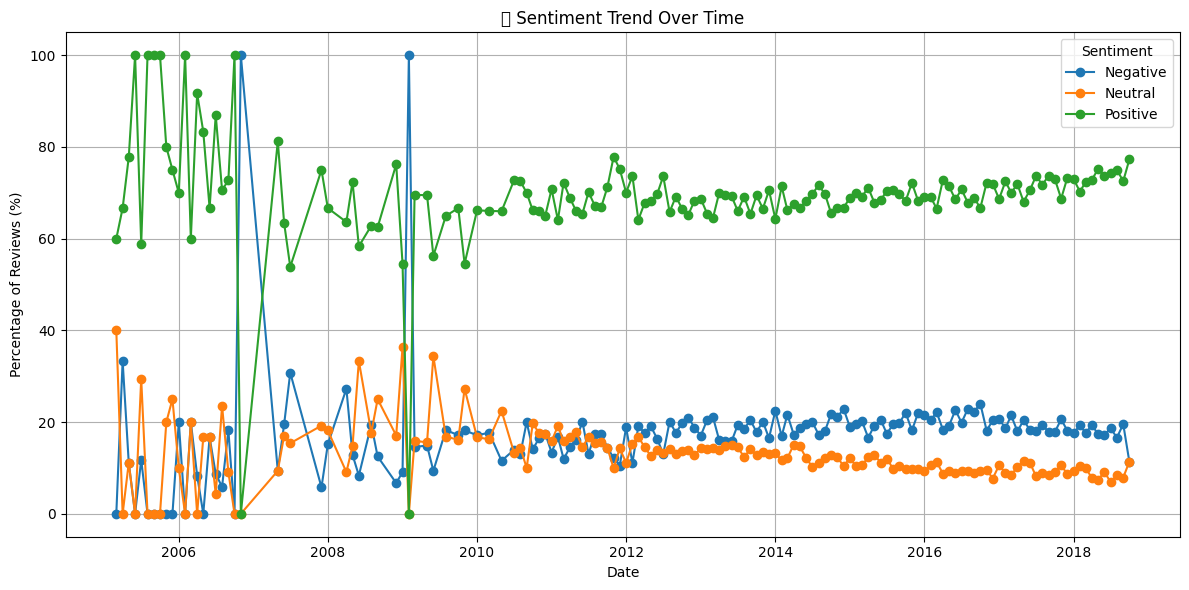

In [214]:
import matplotlib.pyplot as plt

# Ensure 'date' is in datetime format
df['date'] = pd.to_datetime(df['date'])

# Create a 'month' column for grouping
df['month'] = df['date'].dt.to_period('M')

# Group and count sentiment occurrences per month
sentiment_trend = df.groupby(['month', 'sentiment']).size().unstack(fill_value=0)

# Optional: Convert to percentage
sentiment_percent = sentiment_trend.div(sentiment_trend.sum(axis=1), axis=0) * 100

# Convert 'month' back to datetime for proper plotting
sentiment_percent.index = sentiment_percent.index.to_timestamp()

# Plot as a line chart
plt.figure(figsize=(12, 6))
for sentiment in sentiment_percent.columns:
    plt.plot(sentiment_percent.index, sentiment_percent[sentiment], marker='o', label=sentiment.capitalize())

plt.title("📈 Sentiment Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Percentage of Reviews (%)")
plt.legend(title="Sentiment")
plt.grid(True)
plt.tight_layout()
plt.show()


#Key Theme in Reviews

<ipython-input-193-72f717eaf4ff>:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='phrase', data=df, palette=color)


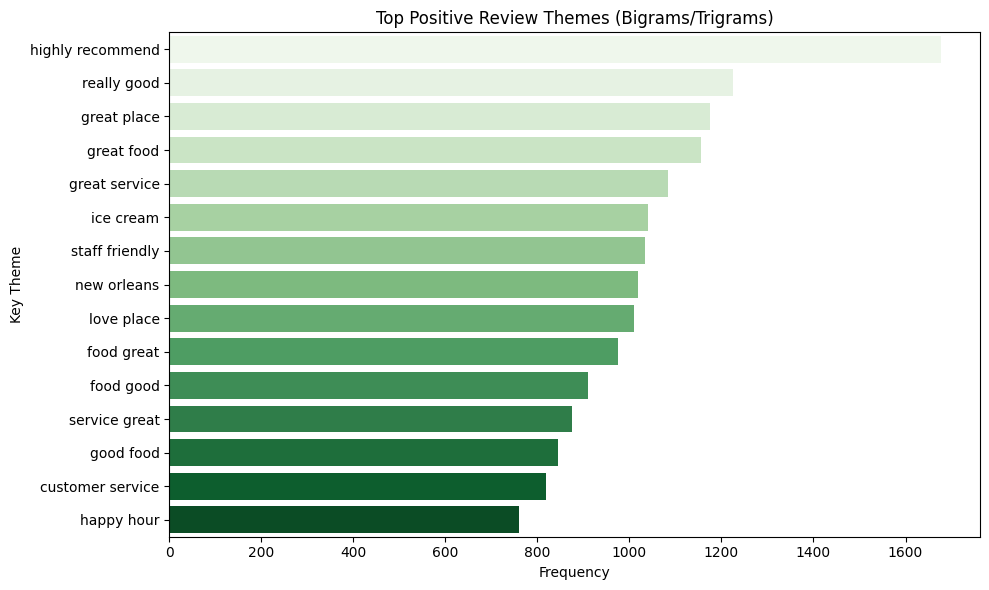

<ipython-input-193-72f717eaf4ff>:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='phrase', data=df, palette=color)


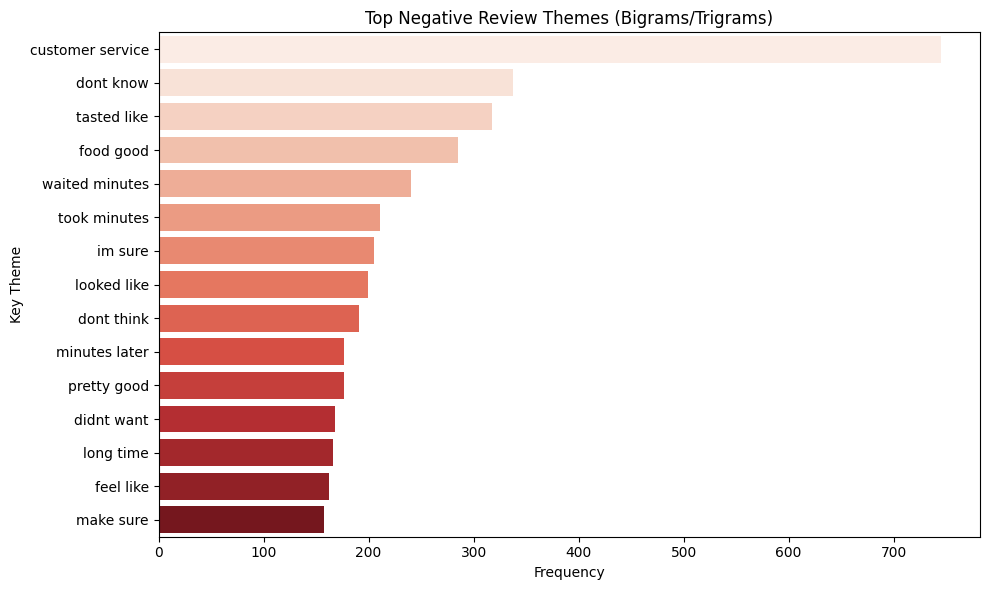

In [193]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

# Assume you already have a cleaned 'clean_text' column and a 'sentiment' column
# sentiment = 'positive' / 'negative' (based on your earlier model)

# Separate reviews
positive_reviews = df[df['sentiment'] == 'positive']['clean_text'].dropna().tolist()
negative_reviews = df[df['sentiment'] == 'negative']['clean_text'].dropna().tolist()

# Define function to extract top n bigrams/trigrams
def get_top_ngrams(corpus, ngram_range=(2, 3), n=None, stop_words='english'):
    vec = CountVectorizer(ngram_range=ngram_range, stop_words=stop_words, max_features=2000)
    X = vec.fit_transform(corpus)
    sum_words = X.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]

# Get top n-grams
top_pos = get_top_ngrams(positive_reviews, ngram_range=(2,3), n=15)
top_neg = get_top_ngrams(negative_reviews, ngram_range=(2,3), n=15)

# Convert to DataFrame for plotting
pos_df = pd.DataFrame(top_pos, columns=['phrase', 'count'])
neg_df = pd.DataFrame(top_neg, columns=['phrase', 'count'])

# Plot function
def plot_ngrams(df, title, color):
    plt.figure(figsize=(10, 6))
    sns.barplot(x='count', y='phrase', data=df, palette=color)
    plt.title(title)
    plt.xlabel('Frequency')
    plt.ylabel('Key Theme')
    plt.tight_layout()
    plt.show()

# Visualize
plot_ngrams(pos_df, 'Top Positive Review Themes (Bigrams/Trigrams)', 'Greens')
plot_ngrams(neg_df, 'Top Negative Review Themes (Bigrams/Trigrams)', 'Reds')


#Sentiment Score for Each Aspect

In [194]:
from textblob import TextBlob

# Step 1: Define your aspects and related keywords
aspects = {
    'food': ['food', 'meal', 'dish', 'taste', 'flavor'],
    'service': ['waiter', 'staff', 'service', 'manager'],
    'price': ['price', 'expensive', 'cheap', 'cost'],
    'ambience': ['ambience', 'atmosphere', 'music', 'decor'],
    'cleanliness': ['clean', 'dirty', 'hygiene'],
}

# Step 2: Function to calculate sentiment for each aspect in a review
def get_aspect_sentiments(review):
    aspect_sentiments = {}
    blob = TextBlob(review)
    for aspect, keywords in aspects.items():
        for sentence in blob.sentences:
            if any(keyword in sentence.lower() for keyword in keywords):
                score = sentence.sentiment.polarity  # -1 to 1
                if aspect not in aspect_sentiments:
                    aspect_sentiments[aspect] = []
                aspect_sentiments[aspect].append(score)
    # Average out sentiments per aspect
    return {k: sum(v)/len(v) if v else 0 for k, v in aspect_sentiments.items()}


In [195]:
review = "The food was cold and tasteless. However, the staff was really friendly. The ambience was nice but a bit noisy."

print(get_aspect_sentiments(review))


{'food': -0.6, 'service': 0.375, 'ambience': 0.6}


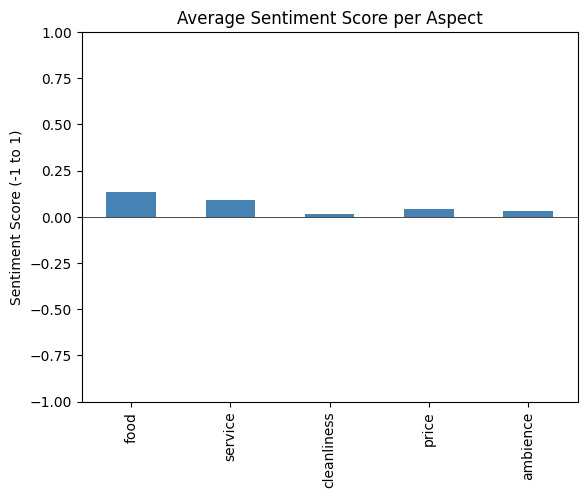

In [196]:
aspect_scores = []

for review in df['clean_text'].head(100):  # Use a sample if data is large
    aspect_scores.append(get_aspect_sentiments(review))

# Convert to DataFrame
import pandas as pd
aspect_df = pd.DataFrame(aspect_scores).fillna(0)

# Average scores for each aspect
avg_aspect_sentiments = aspect_df.mean()

# Plot
import matplotlib.pyplot as plt
avg_aspect_sentiments.plot(kind='bar', color='steelblue')
plt.title("Average Sentiment Score per Aspect")
plt.ylabel("Sentiment Score (-1 to 1)")
plt.ylim(-1, 1)
plt.axhline(0, color='black', linewidth=0.5)
plt.show()


#Reviews Topic Clustering

In [197]:
!pip install -q sentence-transformers scikit-learn


In [198]:
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans
import pandas as pd

# Use a smaller subset if you're using Colab and RAM is limited
sample_reviews = df['clean_text'].dropna().sample(1000, random_state=42).tolist()

# Load pre-trained model
model = SentenceTransformer('all-MiniLM-L6-v2')  # lightweight and fast

# Convert text to embeddings
embeddings = model.encode(sample_reviews, show_progress_bar=True)


Batches:   0%|          | 0/32 [00:00<?, ?it/s]

In [199]:
from sklearn.cluster import KMeans

# Decide number of clusters (you can tune this)
n_clusters = 5

kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(embeddings)


In [200]:
clustered_df = pd.DataFrame({
    'review': sample_reviews,
    'cluster': clusters
})

# See example reviews per cluster
for i in range(n_clusters):
    print(f"\nCluster {i}:")
    print(clustered_df[clustered_df['cluster'] == i]['review'].head(3).to_string(index=False))



Cluster 0:
warning horrible i absolutely love bbq and sout...
if youre looking for fresh spins on the classic...
we purchased the piece fried chicken from the d...

Cluster 1:
i stopped in for dinner and a drink was thoroug...
not only is this place delicious brussel sprout...
a truly great fresh seafood place my favorite i...

Cluster 2:
outstanding i have a german shepard that sheds ...
ive been here about a half dozen times to get a...
downingtown dont even bother only k not impress...

Cluster 3:
great location but the place is very tiny you s...
at this stage in my life to finally get to see ...
very chill atmosphere good selection of micro b...

Cluster 4:
i love hotbox but this location cant seem to ma...
service average food average atmosphere average...
for the amount of time we had to wait youd thin...


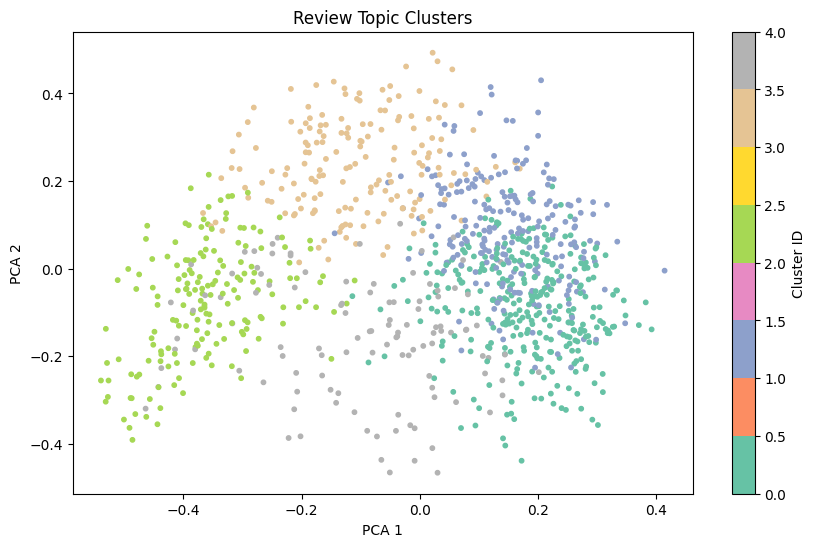

In [201]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reduce dimensions for plotting
pca = PCA(n_components=2)
reduced = pca.fit_transform(embeddings)

plt.figure(figsize=(10, 6))
plt.scatter(reduced[:, 0], reduced[:, 1], c=clusters, cmap='Set2', s=10)
plt.title("Review Topic Clusters")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.colorbar(label='Cluster ID')
plt.show()


In [202]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np


In [203]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import numpy as np

def extract_top_keywords_per_cluster(reviews, cluster_labels, n_keywords=5):
    df = pd.DataFrame({'review': reviews, 'cluster': cluster_labels})
    cluster_keywords = {}

    # Define custom common words to ignore
    common_words = {
        "good", "great", "place", "food", "service", "nice",
        "best", "really", "also", "time", "got", "just"
    }

    for cluster_num in sorted(df['cluster'].unique()):
        cluster_reviews = df[df['cluster'] == cluster_num]['review'].tolist()

        # TF-IDF with unigrams and bigrams
        vectorizer = TfidfVectorizer(
            stop_words='english',
            ngram_range=(1, 2),
            max_features=1000
        )

        X = vectorizer.fit_transform(cluster_reviews)
        tfidf_scores = np.asarray(X.mean(axis=0)).ravel()
        feature_names = vectorizer.get_feature_names_out()

        # Sort terms by TF-IDF score
        sorted_indices = tfidf_scores.argsort()[::-1]

        top_words = []
        for idx in sorted_indices:
            term = feature_names[idx]
            if all(word not in common_words for word in term.split()):
                top_words.append(term)
            if len(top_words) == n_keywords:
                break

        cluster_keywords[cluster_num] = top_words

    return cluster_keywords


In [204]:
topic_keywords = extract_top_keywords_per_cluster(sample_reviews, clusters, n_keywords=5)

# Print topic labels
for cluster_id, keywords in topic_keywords.items():
    label = ", ".join(keywords)
    print(f"Cluster {cluster_id}: {label}")



Cluster 0: chicken, delicious, like, love, fresh
Cluster 1: delicious, friendly, definitely, restaurant, bar
Cluster 2: car, hair, did, friendly, experience
Cluster 3: coffee, staff, bar, like, friendly
Cluster 4: order, minutes, wait, pizza, staff


In [205]:
clustered_df['label'] = clustered_df['cluster'].apply(lambda x: ", ".join(topic_keywords[x]))


In [206]:
print(clustered_df.head())

                                              review  cluster  \
0  great location but the place is very tiny you ...        3   
1  warning horrible i absolutely love bbq and sou...        0   
2  i stopped in for dinner and a drink was thorou...        1   
3  if youre looking for fresh spins on the classi...        0   
4  we purchased the piece fried chicken from the ...        0   

                                              label  
0                coffee, staff, bar, like, friendly  
1             chicken, delicious, like, love, fresh  
2  delicious, friendly, definitely, restaurant, bar  
3             chicken, delicious, like, love, fresh  
4             chicken, delicious, like, love, fresh  


#Emotion Detection

In [207]:
!pip install transformers torch --quiet

In [208]:
from transformers import pipeline

# Load pretrained emotion detection pipeline
emotion_model = pipeline("text-classification",
                         model="j-hartmann/emotion-english-distilroberta-base",
                         return_all_scores=True)


Device set to use cpu
/usr/local/lib/python3.11/dist-packages/transformers/pipelines/text_classification.py:106: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


In [209]:
example = "Very bad and unhealthy dinner"

results = emotion_model(example)[0]

# Sort by score descending
results_sorted = sorted(results, key=lambda x: x['score'], reverse=True)

def interpret_confidence(score):
    if score > 0.75:
        return "High"
    elif score > 0.5:
        return "Moderate"
    else:
        return "Low"

# Print nicely formatted results
print(f"📝 Text: \"{example}\"\n\nDetected Emotions:")

for res in results_sorted:
    label = res['label'].capitalize()
    score_percent = res['score'] * 100
    # confidence = interpret_confidence(res['score'])
    print(f"🔹 {label}: {score_percent:.1f}%")


📝 Text: "Very bad and unhealthy dinner"

Detected Emotions:
🔹 Disgust: 91.4%
🔹 Sadness: 4.2%
🔹 Neutral: 1.7%
🔹 Anger: 1.3%
🔹 Fear: 1.2%
🔹 Surprise: 0.1%
🔹 Joy: 0.1%


In [210]:
def get_top_emotion(text):
    try:
        res = emotion_model(text)[0]
        res_sorted = sorted(res, key=lambda x: x['score'], reverse=True)
        return res_sorted[0]['label']
    except:
        return "Unknown"

# Use on a sample of reviews to avoid RAM issues
df['emotion'] = df['clean_text'].dropna().sample(500, random_state=42).apply(get_top_emotion)


Token indices sequence length is longer than the specified maximum sequence length for this model (578 > 512). Running this sequence through the model will result in indexing errors


<ipython-input-211-16382f774d4f>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='emotion', order=df['emotion'].value_counts().index, palette='Set2')


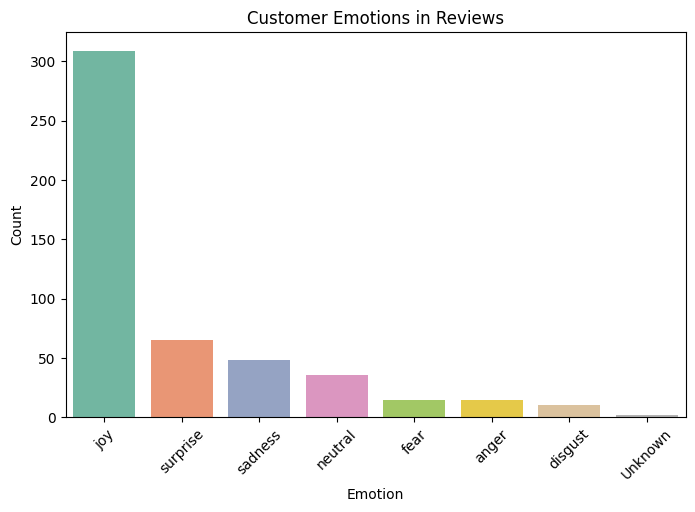

In [211]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='emotion', order=df['emotion'].value_counts().index, palette='Set2')
plt.title("Customer Emotions in Reviews")
plt.xlabel("Emotion")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


# Intent Classification